In [1]:
#!/usr/bin/python
# coding: UTF-8

"""This script parse stock info"""

import tushare as ts


def parse(code_list):
    '''process stock'''
    is_buy = 0
    buy_val = []
    buy_date = []
    sell_val = []
    sell_date = []
    df = ts.get_hist_data(STOCK)
    ma20 = df[u'ma20']
    close = df[u'close']
    rate = 1.0
    idx = len(ma20)

    while idx > 0:
        idx -= 1
        close_val = close[idx]
        ma20_val = ma20[idx]
        if close_val > ma20_val:
                if is_buy == 0:
                        is_buy = 1
                        buy_val.append(close_val)
                        buy_date.append(close.keys()[idx])
        elif close_val < ma20_val:
                if is_buy == 1:
                        is_buy = 0
                        sell_val.append(close_val)
                        sell_date.append(close.keys()[idx])

    print "stock number: %s" % STOCK
    print "buy count   : %d" % len(buy_val)
    print "sell count  : %d" % len(sell_val)

    for i in range(len(sell_val)):
        rate = rate * (sell_val[i] * (1 - 0.002) / buy_val[i])
        print "buy date : %s, buy price : %.2f" % (buy_date[i], buy_val[i])
        print "sell date: %s, sell price: %.2f" % (sell_date[i], sell_val[i])

    print "rate: %.2f" % rate


if __name__ == '__main__':
    STOCK = '600000'  # 浦发银行
    parse(STOCK)


stock number: 600000
buy count   : 39
sell count  : 38
buy date : 2016-07-21, buy price : 15.84
sell date: 2016-07-22, sell price: 15.61
buy date : 2016-07-26, buy price : 15.74
sell date: 2016-07-28, sell price: 15.73
buy date : 2016-08-01, buy price : 15.80
sell date: 2016-08-03, sell price: 15.67
buy date : 2016-08-08, buy price : 15.73
sell date: 2016-09-12, sell price: 16.40
buy date : 2016-09-13, buy price : 16.45
sell date: 2016-09-14, sell price: 16.40
buy date : 2016-09-19, buy price : 16.47
sell date: 2016-10-13, sell price: 16.43
buy date : 2016-10-24, buy price : 16.47
sell date: 2016-10-25, sell price: 16.42
buy date : 2016-11-04, buy price : 16.39
sell date: 2016-12-15, sell price: 16.70
buy date : 2017-01-13, buy price : 16.27
sell date: 2017-02-17, sell price: 16.64
buy date : 2017-02-20, buy price : 16.91
sell date: 2017-02-23, sell price: 16.69
buy date : 2017-04-05, buy price : 16.16
sell date: 2017-04-10, sell price: 15.97
buy date : 2017-05-12, buy price : 15.21
se

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## 简单的曲线图

演示一个简单的曲线图，使用tushare库来获取历年的gdp，使用matplotlib进行绘制。

In [3]:
import tushare as ts

In [4]:
gdp_y = ts.get_gdp_year()

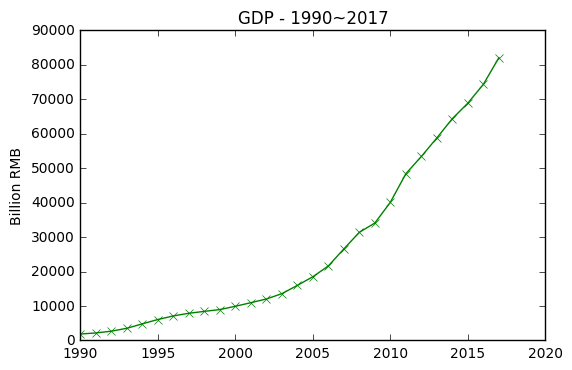

In [7]:
years = gdp_y.year[:28]
gdp = gdp_y.gdp[:28]/10

#创建曲线图，x轴为年份，y轴为gdp
plt.plot(years,gdp,color='green',marker='x',linestyle='solid')
#设置x标题
plt.title('GDP - 1990~2017')
#设置y轴 标记
plt.ylabel('Billion RMB')
plt.show()

In [8]:
pro = ts.pro_api('15cbb84b1fdd9a026aee178b4a1aae1543aaef4b4a08866f4f0c27f1')
df = pro.fut_daily(ts_code='CU1811.SHF', start_date='20180101', end_date='20181113')


In [9]:
print df

        ts_code trade_date  pre_close  pre_settle     open     high      low  \
0    CU1811.SHF   20181113    48900.0     49030.0  48910.0  49040.0  48700.0   
1    CU1811.SHF   20181112    49270.0     49340.0  49130.0  49200.0  48860.0   
2    CU1811.SHF   20181109    49440.0     49500.0  49340.0  49530.0  49120.0   
3    CU1811.SHF   20181108    49470.0     49460.0  49600.0  49680.0  49350.0   
4    CU1811.SHF   20181107    49670.0     49630.0  49640.0  49850.0  49260.0   
5    CU1811.SHF   20181106    49780.0     49890.0  49800.0  49860.0  49500.0   
6    CU1811.SHF   20181105    49820.0     49340.0  49820.0  50290.0  49720.0   
7    CU1811.SHF   20181102    48680.0     48720.0  48780.0  49930.0  48750.0   
8    CU1811.SHF   20181101    49100.0     49120.0  49050.0  49170.0  48510.0   
9    CU1811.SHF   20181031    49650.0     49680.0  49480.0  49480.0  48900.0   
10   CU1811.SHF   20181030    49700.0     49830.0  50020.0  50050.0  49530.0   
11   CU1811.SHF   20181029    49680.0   

In [10]:
pro = ts.pro_api('your token')

df = pro.fut_basic(exchange='DCE', fut_type='1', fields='ts_code,symbol,name,list_date,delist_date,d_mode_desc')

Exception: 抱歉，您输入的TOKEN无效！

In [11]:
df = pro.fut_basic(exchange='DCE', fut_type='1', fields='ts_code,symbol,name,list_date,delist_date,d_mode_desc')
print df

Exception: 抱歉，您输入的TOKEN无效！

In [12]:
df2 = pro.fut_basic(exchange='DCE', fut_type='1', fields='ts_code,symbol,name,list_date,delist_date')
print df2

Exception: 抱歉，您输入的TOKEN无效！

In [14]:
pro = ts.pro_api('15cbb84b1fdd9a026aee178b4a1aae1543aaef4b4a08866f4f0c27f1')

df2 = pro.fut_basic(exchange='DCE', fut_type='1', fields='ts_code,symbol,name,list_date,delist_date,d_mode_desc')
print df2

         ts_code  symbol      name d_mode_desc list_date delist_date
0      P0805.DCE   P0805   棕榈油0805        实物交割  20071029    20080516
1      P0806.DCE   P0806   棕榈油0806        实物交割  20071029    20080616
2      P0807.DCE   P0807   棕榈油0807        实物交割  20071029    20080714
3      P0808.DCE   P0808   棕榈油0808        实物交割  20071029    20080814
4      P0811.DCE   P0811   棕榈油0811        实物交割  20071115    20081114
5      P0812.DCE   P0812   棕榈油0812        实物交割  20071217    20081212
6      P0901.DCE   P0901   棕榈油0901        实物交割  20080116    20090116
7      P0903.DCE   P0903   棕榈油0903        实物交割  20080317    20090313
8      P0906.DCE   P0906   棕榈油0906        实物交割  20080617    20090612
9      P0908.DCE   P0908   棕榈油0908        实物交割  20080815    20090814
10     P0911.DCE   P0911   棕榈油0911        实物交割  20081117    20091113
11     P1001.DCE   P1001   棕榈油1001        实物交割  20090119    20100115
12     P1002.DCE   P1002   棕榈油1002        实物交割  20090216    20100212
13     P1003.DCE   P1003   棕榈油1003

In [33]:
df3 = pro.fut_daily(ts_code='rb1905.SHF', start_date='20180101', end_date= )
print df3

NameError: name 'datetime' is not defined

In [34]:
datetime.datetime.now().strftime('%Y%m%d')

NameError: name 'datetime' is not defined

In [45]:
import datetime 
df3 = pro.fut_daily(ts_code='M1905.DCE', start_date='20180101', end_date=datetime.datetime.now().strftime('%Y%m%d'))
print df3


       ts_code trade_date  pre_close  pre_settle    open    high     low  \
0    M1905.DCE   20190118     2538.0      2540.0  2539.0  2567.0  2526.0   
1    M1905.DCE   20190117     2535.0      2545.0  2537.0  2554.0  2531.0   
2    M1905.DCE   20190116     2577.0      2570.0  2576.0  2584.0  2524.0   
3    M1905.DCE   20190115     2566.0      2588.0  2563.0  2583.0  2555.0   
4    M1905.DCE   20190114     2628.0      2641.0  2629.0  2633.0  2556.0   
5    M1905.DCE   20190111     2670.0      2673.0  2669.0  2673.0  2625.0   
6    M1905.DCE   20190110     2674.0      2674.0  2674.0  2688.0  2658.0   
7    M1905.DCE   20190109     2677.0      2688.0  2679.0  2682.0  2665.0   
8    M1905.DCE   20190108     2697.0      2698.0  2707.0  2708.0  2674.0   
9    M1905.DCE   20190107     2698.0      2687.0  2695.0  2715.0  2685.0   
10   M1905.DCE   20190104     2661.0      2654.0  2663.0  2703.0  2659.0   
11   M1905.DCE   20190103     2646.0      2639.0  2646.0  2664.0  2641.0   
12   M1905.D

In [ ]:
import QUANTAXIS as QA

In [46]:
QA.QA_util_log_info('期货日线')


NameError: name 'QA' is not defined